## Section 1: Loading Data ##
This section will only be run once and does not need to be run again

In [24]:
#DONT RUN THIS ANYMORE
from datasets import load_dataset, Dataset
from convokit import Corpus, download


""" Formal"""
ds_ag_news = load_dataset("fancyzhx/ag_news") #news, formal

""" Semi-formal"""
ds_medium = load_dataset('csv', data_files='/Users/rheamadhogarhia/Desktop/Year 3/NLP/nlpfinal/medium_articles.csv') #medium articles, academic but also likely less formal ? community contributions
#https://huggingface.co/datasets/kariatouk/enron_curated_labeled/tree/main
ds_podcast_news = load_dataset("Whispering-GPT/lex-fridman-podcast")

"""Educational"""
ds_edu = load_dataset("Locutusque/UltraTextbooks") #synthetic and human written textbooks..... acdademic / formal
#https://huggingface.co/datasets/fabiochiu/medium-articles
# khan academy dataset

"""Informal"""
ds_sms = load_dataset("ucirvine/sms_spam") #should only use ham labels, text messages, informal
ds_telephone_convos = Corpus(filename=download("switchboard-corpus"))


ds_medium = load_dataset('csv', data_files='/Users/rheamadhogarhia/Desktop/Year 3/NLP/nlpfinal/medium_articles.csv') #medium articles, academic but also likely less formal ? community contributions
#https://huggingface.co/datasets/kariatouk/enron_curated_labeled/tree/main
ds_enron= load_dataset('csv', data_files='/Users/rheamadhogarhia/Desktop/Year 3/NLP/nlpfinal/enron_labeled_curated.csv') #enron, very formal business emails probably?




data = ds_telephone_convos.get_utterances_dataframe() 
data_list = data.to_dict(orient="records")
ds_telephone_convos = Dataset.from_list(data_list)

ds_ted_talk_edu = load_dataset('csv', data_files="/Users/rheamadhogarhia/Desktop/Year 3/NLP/nlpfinal/ted_talks_en.csv")
ds_un_debates = load_dataset('csv', data_files="/Users/rheamadhogarhia/Desktop/Year 3/NLP/nlpfinal/un-general-debates.csv") # formal
#city council meetings instead https://huggingface.co/datasets/lytang/MeetingBank-transcript?row=8&library=datasets
ds_business_meetings = load_dataset("lytang/MeetingBank-transcript") 
#this cell ran in 21 minutes (probably don't have to load the whole dataset?)



ModuleNotFoundError: No module named 'convokit'

In [23]:
%pip install convokit

  Using cached convokit-3.1.0.tar.gz (193 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached scipy-1.15.2-cp312-cp312-macosx_14_0_arm64.whl.metadata (61 kB)
  Using cached numpy-2.2.3-cp312-cp312-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached msgpack_numpy-0.4.8-py2.py3-none-any.whl.metadata (5.0 kB)
  Using cached spacy-3.8.4-cp312-cp312-macosx_11_0_arm64.whl.metadata (27 kB)
  Using cached clean_text-0.6.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached pymongo-4.11.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (22 kB)
  Using cached dnspython-2.7.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached thinc-8.3.4-cp312-cp312-macosx_11_0_arm64.whl.metadata (15 kB)
  Using cached h5py-3.12.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (2.5 kB)
  Using cached ruff-0.9.6-py3-none-macosx_11_0_arm64.whl.metadata (25 kB)
  Using cached accelerate-1.4.0-py3-none-any.whl.metadata (19 kB)

In [ ]:
%pip install 

In [ ]:
ds_telephone_convos[0:2]

{'timestamp': [None, None],
 'text': ['Okay.  /{D So, }', '[ [ I guess, +'],
 'speaker': ['1519', '1632'],
 'reply_to': [None, '4325-0'],
 'conversation_id': ['4325-0', '4325-0'],
 'meta.tag': [[['Okay.  /', 'o'], ['{D So, }', 'qw']],
  [['[ [ I guess, +', 'qy^d']]],
 'vectors': [[], []]}

In [ ]:
#TRAIN SETS, choosing 500 samples frome each written text set
num_samples = 500

ds_ag_news_sub = ds_ag_news["train"].shuffle(seed=42).select(range(num_samples))
#filtering out the spam label - only getting legitimate texts
ds_sms_filtered = ds_sms["train"].filter(lambda example: example['label'] == 0)
ds_sms_sub = ds_sms_filtered.shuffle(seed=42).select(range(num_samples))
ds_edu_sub = ds_edu["train"].shuffle(seed=42).select(range(num_samples))
ds_medium_sub = ds_medium["train"].shuffle(seed=42).select(range(num_samples))
ds_enron_sub = ds_enron["train"].shuffle(seed=42).select(range(num_samples))


ds_podcast_news_sub = ds_podcast_news["train"].shuffle(seed=42).select(range(100))#podcasts are long so only gonna use 100 samples
ds_telephone_sub = ds_telephone_convos.shuffle(seed=42).select(range(num_samples))
ds_ted_talk_edu_sub = ds_ted_talk_edu["train"].shuffle(seed=42).select(range(num_samples))
ds_business_meetings_sub = ds_business_meetings["train"].shuffle(seed=42).select(range(num_samples))
ds_un_debates_sub = ds_un_debates["train"].shuffle(seed=42).select(range(num_samples))


In [ ]:
ds_un_debates_sub[0:2]

{'session': [58, 65],
 'year': [2003, 2010],
 'country': ['ISR', 'TGO'],
 'text': ['\ufeffI would like to congratulate\nHis Excellency, the Foreign Minister of Saint Lucia,\nupon his assumption of the Presidency of the General\nAssembly, and wish him much success.\nUntil just one month ago, every person in this hall\nand every Member of this Organization joined us in the\nhope that the Middle East peace process might finally\nbe back on track, and that a resolution of the Israeli-\nPalestinian conflict might be on the horizon. The\nestablishment of a new Palestinian Government\npromised an end to terror and a new beginning.\nThis glimmer of hope was darkened on 19 August\nby the extremists who blew up a bus full of Jewish\nfamilies on their way home from prayers at the Western\nWall, the holiest site in the Jewish religion. Twenty-\nthree people, young and old, mothers and babies in\ntheir cradles, were slaughtered in that attack. That\nattack was carried out by Hamas, a terrorist\norg

In [ ]:
#combine
from datasets import Dataset, concatenate_datasets
import random

ag_news_dataset = Dataset.from_dict({"text": ds_ag_news_sub["text"], 
                                     "source": ["ag_news"] * len(ds_ag_news_sub),
                                     "formality": ["formal"] * len(ds_ag_news_sub)})
medium_dataset = Dataset.from_dict({"text": ds_medium_sub["text"], 
                                    "source": ["medium"] * len(ds_medium_sub),
                                    "formality": ["formal"] * len(ds_medium_sub)})
edu_dataset = Dataset.from_dict({"text": ds_edu_sub["text"], 
                                 "source": ["textbooks"] * len(ds_edu_sub),
                                 "formality": ["educational"] * len(ds_edu_sub)})
sms_dataset = Dataset.from_dict({"text": ds_sms_sub["sms"], 
                                 "source": ["sms"] * len(ds_sms_sub), 
                                 "formality": ["informal"] * len(ds_sms_sub)})
enron_dataset = Dataset.from_dict({"text": ds_enron_sub["email"], 
                                   "source": ["enron_emails"] * len(ds_enron_sub), 
                                   "formality": ["formal"] * len(ds_enron_sub)})


combined_written_dataset = concatenate_datasets([ag_news_dataset, medium_dataset, edu_dataset, sms_dataset, enron_dataset])
combined_written_dataset = combined_written_dataset.add_column("type", ["written"] * len(combined_written_dataset))



podcast_news_dataset = Dataset.from_dict({"text": ds_podcast_news_sub["text"], 
                                     "source": ["podcasts"] * len(ds_podcast_news_sub), 
                                     "formality": ["informal"] * len(ds_podcast_news_sub)})
un_debates_dataset = Dataset.from_dict({"text": ds_un_debates_sub["text"], 
                                   "source": ["un_debates"] * len(ds_un_debates_sub),
                                   "formality": ["formal"] * len(ds_un_debates_sub)})
ted_talk_edu_dataset = Dataset.from_dict({"text": ds_ted_talk_edu_sub["transcript"], 
                                 "source": ["ted_talks"] * len(ds_ted_talk_edu_sub),
                                 "formality": ["educational"] * len(ds_ted_talk_edu_sub)})
telephone_dataset = Dataset.from_dict({"text": ds_telephone_sub["text"], 
                                    "source": ["telephone_convos"] * len(ds_telephone_sub), 
                                    "formality": ["informal"] * len(ds_telephone_sub)})
business_meetings_dataset = Dataset.from_dict({"text": ds_business_meetings_sub["source"], 
                                 "source": ["business_meetings"] * len(ds_business_meetings_sub),
                                 "formality": ["formal"] * len(ds_business_meetings_sub)})

combined_spoken_dataset = concatenate_datasets([podcast_news_dataset, un_debates_dataset, ted_talk_edu_dataset, telephone_dataset, business_meetings_dataset])
combined_spoken_dataset = combined_spoken_dataset.add_column("type", ["spoken"] * len(combined_spoken_dataset))

full_dataset = concatenate_datasets([combined_spoken_dataset, combined_written_dataset])

full_dataset = full_dataset.shuffle(seed=42)
full_dataset.to_csv("spoken_written_full_dataset.csv")

print(full_dataset[:5])


Creating CSV from Arrow format:   0%|          | 0/5 [00:00<?, ?ba/s]

{'text': ['Ukraine appears set for new poll It looks likely that Ukraine will hold a new election as it awaits a supreme court verdict on electoral fraud.', 'Mozambique Prepares for Elections to Replace Chissano Mozambique holds elections on Wednesday and Thursday to choose a successor to President Joaquim Chissano, who ruled for 18 years and led the southern African country to peace after a long civil war that claimed up to a million lives.', "The year that has elapsed since the forty-\nseventh session of the General Assembly was noteworthy for\nthe further growth in the authority and the effectiveness of\nthe United Nations. It testifies, in our view, to the deep\nunderstanding that the members of the world community\nhave about the need for close, constructive cooperation in\nthe name of a better future. As I look around this Hall, in\nwhich, for the first time, a Head of State of a sovereign\nTajikistan is speaking, the words of the great poet Saadi\ncome to my mind:\n'The sons of 

## Section 2: Preprocessing Dataset ##

In [1]:
%pip install datasets

Note: you may need to restart the kernel to use updated packages.


In [2]:
from datasets import load_dataset, Dataset
# from convokit import Corpus, download

In [3]:
#Load in new dataset 
full_dataset = load_dataset('csv', data_files='spoken_written_full_dataset.csv') #medium articles, academic but also likely less formal ? community contributions

#preprocessing to do
#lowercase
#get rid of links
#get rid of code?
# get rid of maybe = signs and equations
#speaker 1 etc? maybe we need to preprocess each source differenlty


### Data Analysis ###

In [4]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from tqdm import tqdm

from nltk.tokenize import sent_tokenize, word_tokenize

[nltk_data] Downloading package punkt to /Users/Shivani/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/Shivani/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [5]:
def preprocess_corpus(data):
    """ Tokenize, sentencize, and lowercase the input data.

        Args:
            data: list of strings, where each string is a document

        Return:
            list of lists, with tokenized, lowercased sentences from each of the processed rows
    """
    tokenized_sentences = []

    for doc in tqdm(data):
        sentences = sent_tokenize(doc)
        for sentence in sentences:
            tokenized_sentences.append(word_tokenize(sentence.lower()))
    return tokenized_sentences

In [6]:
ds_processed = preprocess_corpus(full_dataset['train']['text'])

100%|██████████| 4600/4600 [00:19<00:00, 239.81it/s]


In [7]:
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Download stopwords list
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

def analyze_tokens(tokenized_data):
    """ Perform token & vocabulary analysis.

        Args:
            tokenized_data: List of tokenized sentences (list of lists)
            dataset_name: String, name of the dataset for labeling
    """
    # Flatten tokenized sentences into a single list of words
    all_words = [word for sentence in tokenized_data for word in sentence]

    # Vocabulary size
    vocab_size = len(set(all_words))
    print(f"Vocabulary Size: {vocab_size}")

    # Most common words
    word_counts = Counter(all_words)
    most_common_words = word_counts.most_common(20)
    print(f"Most Common Words:")
    print(most_common_words)

    # Stopword Distribution
    stopword_count = sum(word_counts[word] for word in stop_words if word in word_counts)
    total_words = sum(word_counts.values())
    stopword_ratio = stopword_count / total_words
    print(f"Stopword Ratio: {stopword_ratio:.2%}\n")

    # Plot Most Common Words
    words, counts = zip(*most_common_words)
    plt.figure(figsize=(10, 5))
    plt.bar(words, counts)
    plt.xticks(rotation=45)
    plt.title(f"Most Common Words")
    plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Shivani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Vocabulary Size: 95744
Most Common Words:
[(',', 407280), ('.', 404679), ('the', 403775), ('and', 238050), ('of', 233009), ('to', 217023), ('that', 160595), ('a', 151454), ('in', 127824), ('i', 118141), ('you', 102647), ('it', 102318), ('is', 100091), ('we', 83635), ("'s", 80749), ('for', 64462), ('this', 59248), ('so', 51067), ('on', 48496), ('have', 47370)]
Stopword Ratio: 43.00%



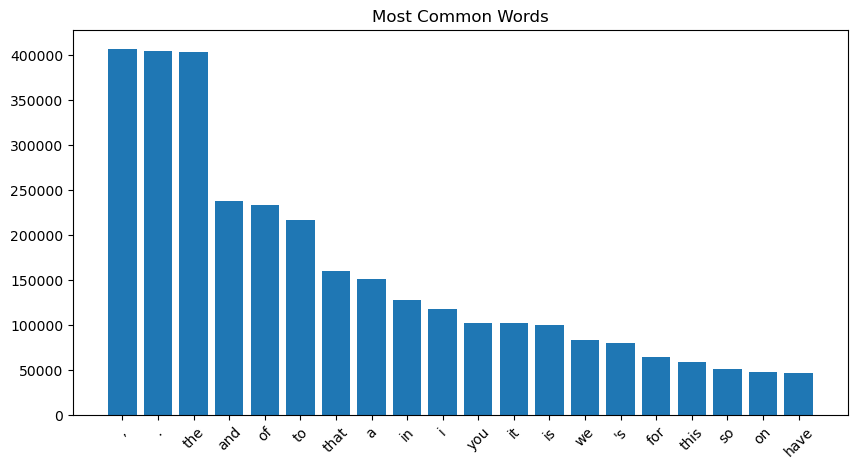

In [8]:
analyze_tokens(ds_processed)

## Section 3: Mini BERT and Shap Testing ##
Going to start testing how BERT/TogetherAI and SHAP will work using a super small subset of the data

In [9]:
import os 
os.environ["TOGETHER_API_KEY"] = "tgp_v1_0k4LmNbB6di_vPP-tYoWKw8_eEO2o6qzpKcYHRt1j9Q"

In [10]:
%pip install together

Note: you may need to restart the kernel to use updated packages.


In [28]:
full_dataset['train']


Dataset({
    features: ['text', 'source', 'formality', 'type'],
    num_rows: 4600
})

In [58]:
"""Sampling 10 texts from each source for testing """
from datasets import concatenate_datasets
ds_sampled = []
sources = full_dataset['train'].unique('source')
for source in sources:
    source_data = full_dataset['train'].filter(lambda example: example['source']==source)
    ds_sampled.append(source_data.shuffle(seed=42).select(range(10)))

ds_sampled = concatenate_datasets(ds_sampled)
ds_sampled = ds_sampled.shuffle(seed=42)

Weak industrial output weighs on British growth (AFP) AFP - Britain's industrial sector appears to have been a bigger drag on overall economic growth in the third quarter than was first assumed.
 The following is a conversation with Jeremy Howard. He's the founder of Fast AI, a research institute dedicated to making deep learning more accessible. He's also a distinguished research scientist at the University of San Francisco, a former president of Kaggle, as well as a top ranking competitor there. And in general, he's a successful entrepreneur, educator, researcher, and an inspiring personality in the AI community. When someone asks me, how do I get started with deep learning? Fast AI is one of the top places I point them to. It's free, it's easy to get started, it's insightful and accessible, and if I may say so, it has very little BS. It can sometimes dilute the value of educational content on popular topics like deep learning. Fast AI has a focus on practical application of deep lea

# Testing to make sure together AI is connected #
from together import Together

client = Together()

stream = client.chat.completions.create(
  model="meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo",
  messages=[{"role": "user", "content": "What are the top 3 things to do in New York?"}],
  stream=True,
)

for chunk in stream:
  print(chunk.choices[0].delta.content or "", end="", flush=True)

In [59]:
from together import Together
client = Together()
outputs = client.embeddings.create(input=ds_sampled['text'],model="togethercomputer/m2-bert-80M-32k-retrieval")
outputs

EmbeddingResponse(id=None, model='togethercomputer/m2-bert-80M-32k-retrieval', object='list', data=[EmbeddingChoicesData(index=0, object=<ObjectType.Embedding: 'embedding'>, embedding=[-0.017296758, 0.008297809, 0.035353575, -0.0064741457, -0.029267902, 0.010920124, -0.00019371882, -0.09177289, -0.035705537, -0.110167615, -0.057584785, 0.03206728, 0.007013923, -0.039606735, -0.0017686989, -0.08764943, 0.02435919, 0.02683763, -0.03559518, 0.027865956, 0.066436805, 0.02023285, -0.0040518697, 0.01675414, 0.064540744, -0.006614175, 0.049970035, 0.019116119, 0.081344664, -0.006505785, 0.023675434, 0.0131740235, 0.01963102, 0.0021236134, -0.023983998, 0.005307646, 0.0056086453, 0.06271414, 0.026000718, 0.079371646, 0.043684483, -0.00609677, -0.0179466, -0.018775178, 0.041093335, -0.014876557, -0.0019512776, 0.020321367, 0.14457263, 0.001648568, -0.050631616, 0.09842713, 0.11579389, -0.004034283, 0.021998925, -0.024409134, 0.05775646, 0.012329557, 0.053504433, -0.057440914, 0.021897757, 0.026

In [60]:
embeddings = [x.embedding for x in outputs.data]

In [61]:
import numpy as np
np.save("sample_embeddings.npy", embeddings)
ds_sampled.to_csv("sample_dataset.csv")

Creating CSV from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

1604087

In [78]:
"""Visualize Embeddings"""
import os
import argparse
from typing import List

import matplotlib
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

def plot_embeddings(embeddings: List[np.ndarray], sort_type):
    """Plot transformed embedding vectors with predefined labels.

    Args:
        embed_arr_ls: a list of np.ndarray. Each np.ndarray is a matrix with embeddings corresponding to data examples.
        names: a list of str. The names of the data sources. The length of this list should be the same as the length of embed_arr_ls.

    Returns:
        None
    """
    embed_arr_ls = np.array(embeddings)
    tsne = TSNE(n_components=2, perplexity=30, random_state=42, init='random')
    vis_dims = tsne.fit_transform(embed_arr_ls)

    cmap = plt.get_cmap('tab20')
    types = ds_sampled.unique(sort_type)
    types_to_index = {type: i for i, type in enumerate(types)}
    colors = [cmap(i) for i in range(len(types))]
    color_indices = []
    for label in ds_sampled[sort_type]:
        color_indices.append(types_to_index[label])
    assert (len(vis_dims) == len(color_indices))
    
    x = [x for x,_ in vis_dims]
    y = [y for _,y in vis_dims]

    fig, ax = plt.subplots()
    scatter = ax.scatter(x, y, c=color_indices, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)
    legend1 = ax.legend(handles=scatter.legend_elements()[0], labels=types,
                        title=sort_type, loc="best")
    ax.add_artist(legend1)

    plt.title("Embedded Visualization using t-SNE")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.show()

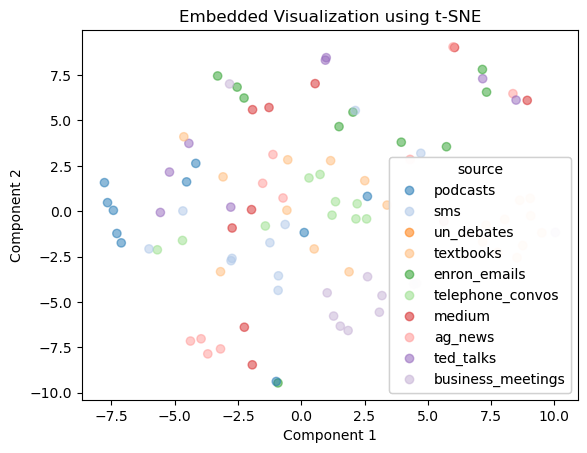

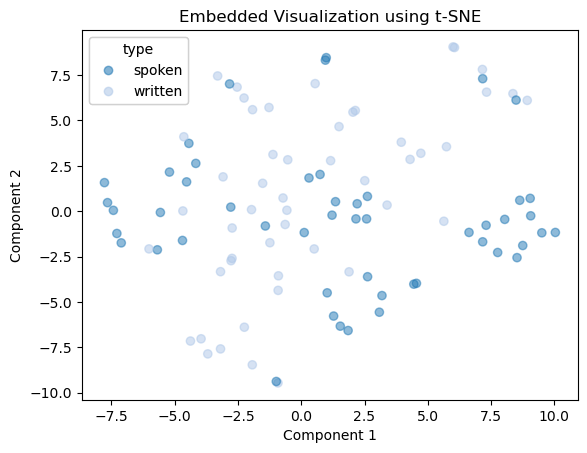

In [79]:
plot_embeddings(embeddings, "source")
plot_embeddings(embeddings, "type")

In [76]:
ds_sampled

Dataset({
    features: ['text', 'source', 'formality', 'type'],
    num_rows: 100
})